In [19]:
import numpy as np
import matplotlib.pyplot as plt
import Qchains
import plotly.graph_objects as go
from scipy.optimize import curve_fit

In [20]:
points_5 = Qchains.ArrayGenerator(5, showStructure=False)

In [21]:
middle_index_5 = len(points_5) // 2
points_4_cmissing = np.delete(points_5, middle_index_5, axis=0)
points_4_cmissing

array([[0., 0., 0.],
       [1., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.]])

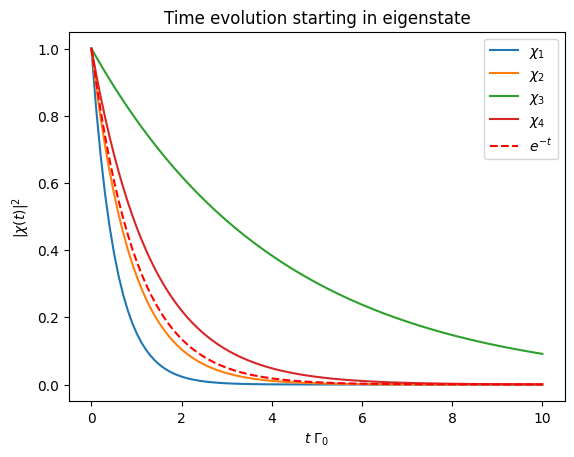

In [22]:
dipole_vector_hat_4 = np.array([0, 1, 0]) #i y retning 
d_4 = 0.25
eig_vals_4, eig_vec_4 = Qchains.FindEigenstates(points_4_cmissing, dipole_vector_hat_4, d_4)
time = np.linspace(0, 10, 100)

Qchains.PlotEigenstateEvolution(eig_vals_4, eig_vec_4, time, legend=True)

### Compare N = 10 uninterupted and N = 10 interrupted

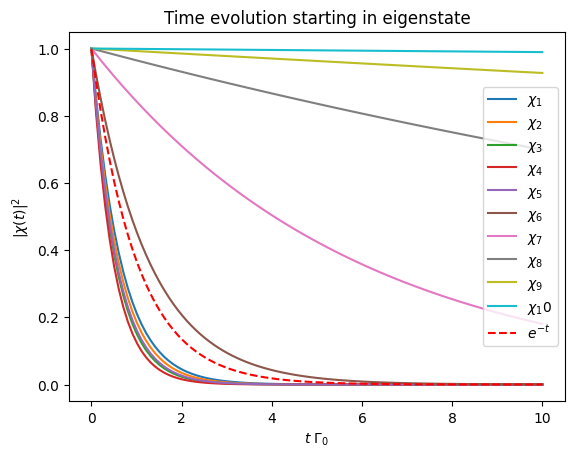

In [23]:
points_11 = Qchains.ArrayGenerator(10, showStructure=False)
dipole_vector_hat_11 = np.array([0, 1, 0]) #i y retning 
d_11 = 0.25
eig_val_10_un, eig_vec_10_un = Qchains.FindEigenstates(points_11, dipole_vector_hat_11, d_11)
time = np.linspace(0, 10, 100)

Qchains.PlotEigenstateEvolution(eig_val_10_un, eig_vec_10_un, time, legend=True)

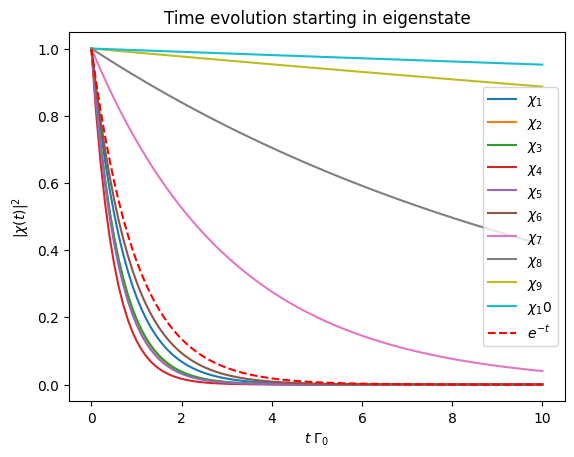

In [24]:
points_11 = Qchains.ArrayGenerator(11, showStructure=False)

middle_index_11 = len(points_11) // 2
points_10_cmissing = np.delete(points_11, middle_index_11, axis=0)

dipole_vector_hat_10 = np.array([0, 1, 0]) #i y retning 
d_10 = 0.25
eig_val_10, eig_vec_10 = Qchains.FindEigenstates(points_10_cmissing, dipole_vector_hat_10, d_10)
time = np.linspace(0, 10, 100)

Qchains.PlotEigenstateEvolution(eig_val_10, eig_vec_10, time, legend=True)

In [25]:
np.set_printoptions(suppress=True, precision=7)
np.round(np.sort(-2 * eig_val_10.real), 7) #interrupted

array([0.0049133, 0.0120174, 0.0874881, 0.3213933, 1.1842498, 1.3445508,
       1.6318397, 1.6532574, 1.7230462, 2.037244 ])

In [26]:
np.round(np.sort(-2 * eig_val_10_un.real), 7) #uninterrupted

array([0.0010731, 0.0075578, 0.03585  , 0.1712663, 0.785966 , 1.5459091,
       1.6801267, 1.8153911, 1.881983 , 2.0748767])

Ligner jeg 'mister' ekstremerne. Får mindre subradiant (0.0049133 for N = 10 og 0.0010731 for N = 10) og mindre superradiant (2.037244, N = 10 vs. 2.074 for N = 10)

### Vary D for N = 50 (missing in middle)

(0.0, 3.0)

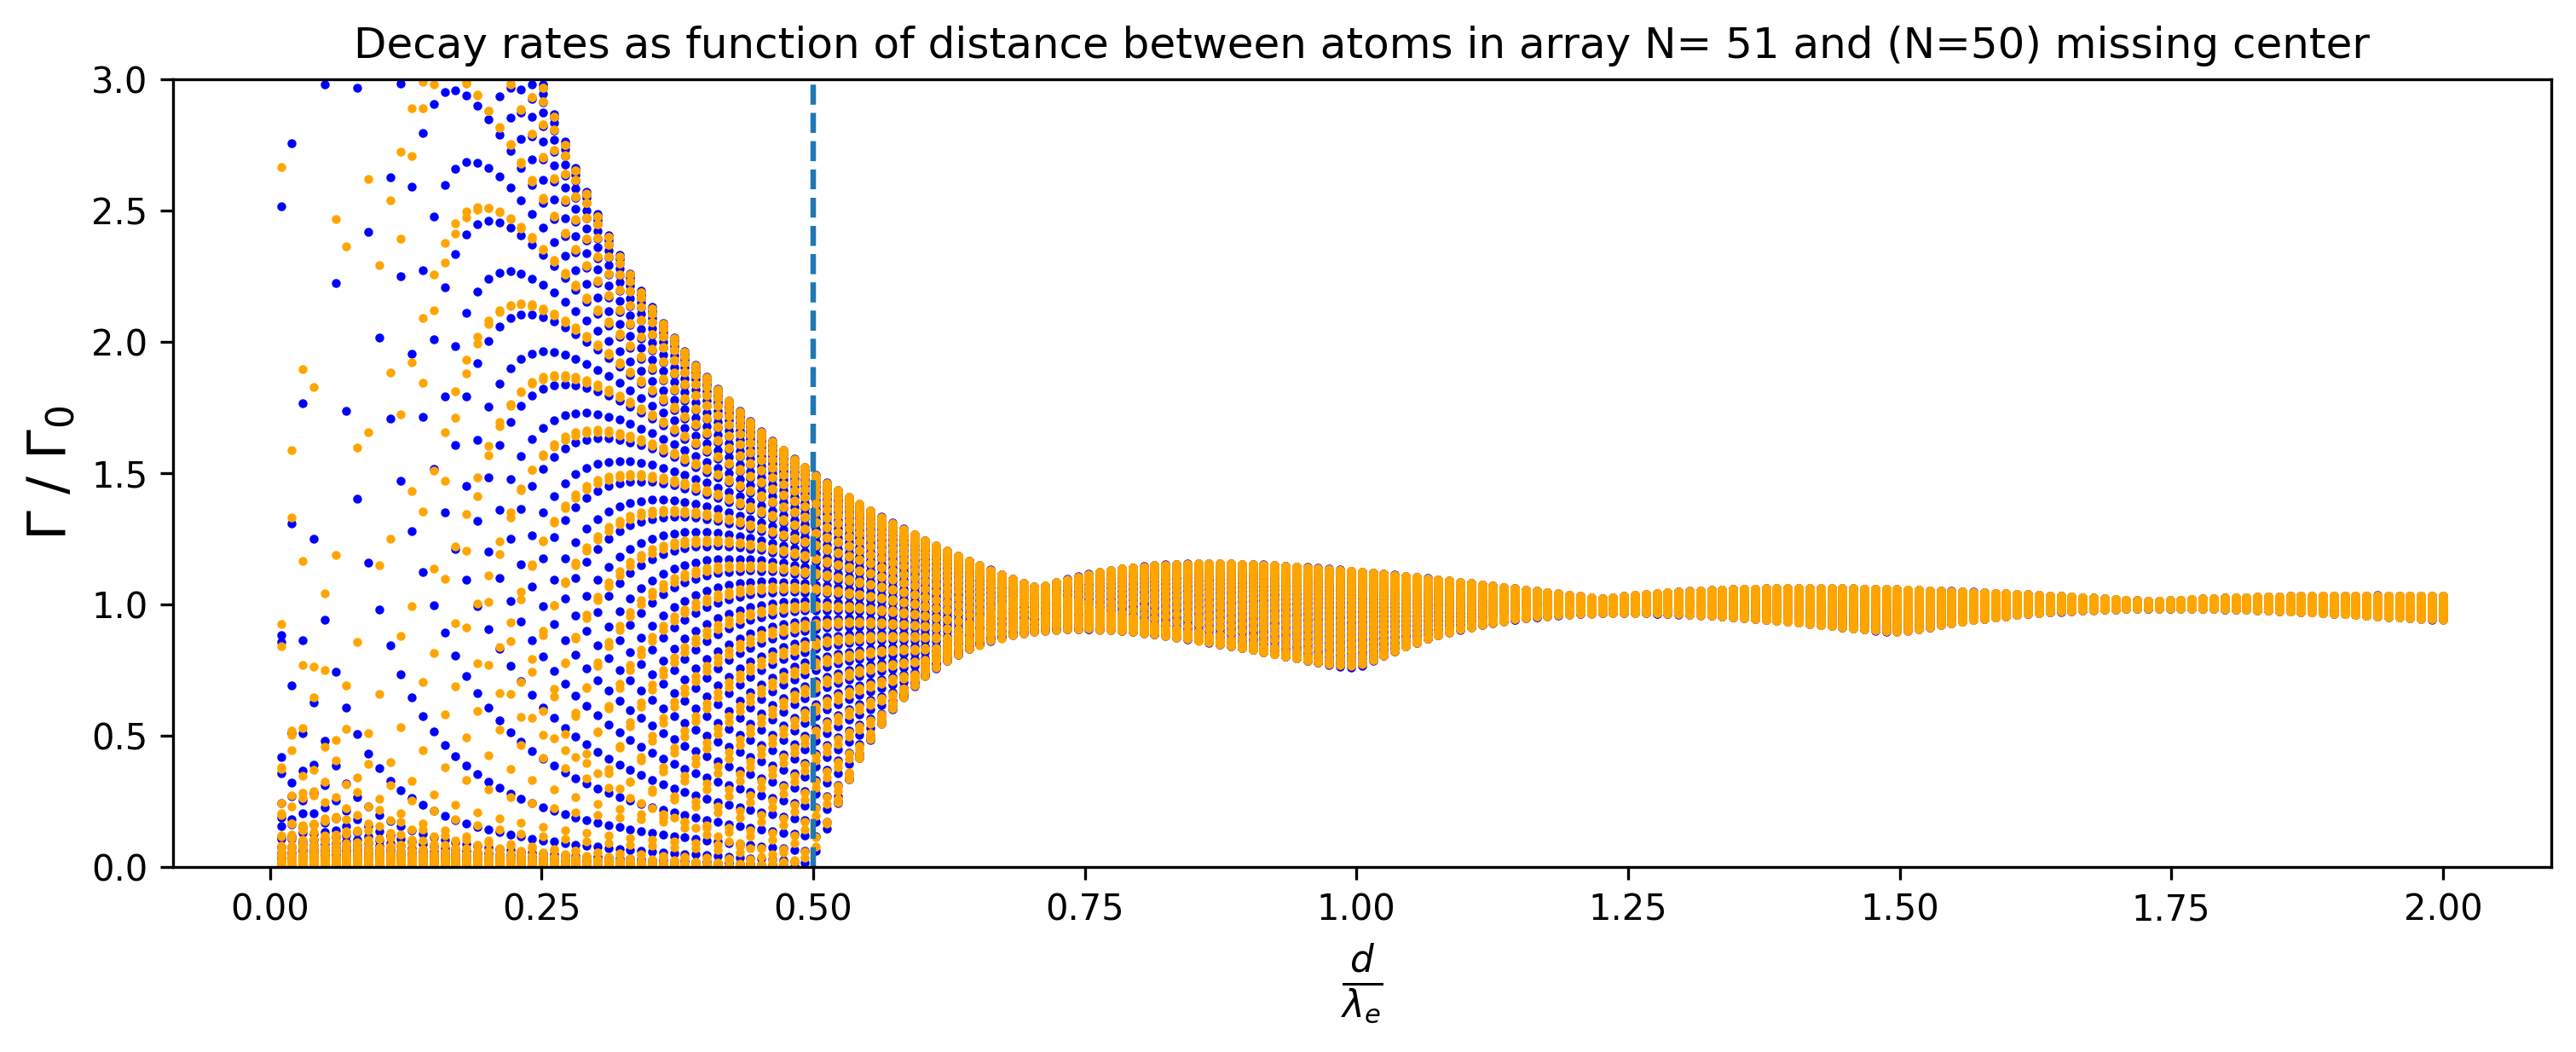

In [27]:
dipole_vector_hatx_51 = np.array([1, 0, 0]) #i x retning
points_50 = Qchains.ArrayGenerator(50)
decay_rate_list_50_un = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates
for d in distances[1:]:
    eig_vals50_un, eig_vec_50_un = Qchains.FindEigenstates(points_50, dipole_vector_hatx_51, d)
    decay_rate_50_un = 2 * eig_vals50_un.real
    decay_rate_list_50_un.append(decay_rate_50_un)
    

decay_rate_list_reversed_50_un = [-p for p in decay_rate_list_50_un]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed_50_un, '.', c = 'blue', markersize=3); #skal gange med pi for x-akse korrekt her. 
plt.xlabel(r'\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
#plt.title('Decay rates as function of distance between atoms in array (N=51)')

plt.ylim(-0, 5)


dipole_vector_hatx_50 = np.array([1, 0, 0]) #i x retning
points_51 = Qchains.ArrayGenerator(51)
middle_index_51 = len(points_51) // 2
points_50_cmissing = np.delete(points_51, middle_index_51, axis=0)

decay_rate_list_50 = []
distances = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates
for d in distances[1:]:
    eig_vals50, eig_vec_50 = Qchains.FindEigenstates(points_50_cmissing, dipole_vector_hatx_50, d)
    decay_rate_50 = 2 * eig_vals50.real
    decay_rate_list_50.append(decay_rate_50)
    

decay_rate_list_reversed_50 = [-p for p in decay_rate_list_50]
#plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed_50, '.', c = 'orange', markersize=3); #skal gange med pi for x-akse korrekt her. 
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of distance between atoms in array N= 51 and (N=50) missing center')

plt.ylim(-0, 3)


In [28]:
#Uninterrupted
dipole_vector_hatx_51 = np.array([0, 1, 0]) #i x retning
points_50 = Qchains.ArrayGenerator(50)
d_50_un = 0.125
eig_val_50_un, eig_vec_50_un = Qchains.FindEigenstates(points_50, dipole_vector_hatx_51, d_50_un)

#Interrupted
dipole_vector_hatx_50 = np.array([0, 1, 0]) #i x retning
points_51 = Qchains.ArrayGenerator(51)
d_50 = 0.125

middle_index_51 = len(points_51) // 2
points_50_cmissing = np.delete(points_51, middle_index_51, axis=0)

eig_val_50, eig_vec_50 = Qchains.FindEigenstates(points_50_cmissing, dipole_vector_hatx_50, d_50)

# x, y, z = points_50_cmissing[:, 0], points_50_cmissing[:, 1], points_50_cmissing[:, 2]

# #interactive scatter plot
# fig = go.Figure(data=[go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='markers',
#     marker=dict(size=5, color=z, colorscale='Viridis', opacity=0.8)
# )])

# # Customize layout
# fig.update_layout(
#     title="Geometry of the atoms",
#     scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
#     margin=dict(l=0, r=0, b=0, t=40)
# )
# fig.show()


In [29]:
np.round(np.sort(-2 * eig_val_50_un.real), 7) #Uninterrupted

array([0.0000177, 0.0000556, 0.0001606, 0.0002231, 0.0004549, 0.0005051,
       0.0009047, 0.0009191, 0.0014247, 0.0015842, 0.0020648, 0.0024991,
       0.002818 , 0.0036664, 0.003706 , 0.0037395, 0.004282 , 0.0045826,
       0.0054212, 0.0055615, 0.0063236, 0.0067623, 0.0069247, 0.0077194,
       0.0089876, 0.010881 , 0.0135661, 0.0151378, 0.0151593, 0.0181285,
       0.0203359, 0.0237141, 0.0353612, 0.0398988, 0.0760643, 0.1679813,
       1.0917227, 2.9589603, 3.0174881, 3.0698696, 3.1568342, 3.2778847,
       3.4319865, 3.6177042, 3.8319986, 4.0698911, 4.3198752, 4.3925261,
       4.554847 , 4.6908749])

In [30]:
np.round(np.sort(-2 * eig_val_50.real), 7) #Interrupted

array([0.0000725, 0.0001595, 0.0002939, 0.000464 , 0.0006759, 0.0008606,
       0.001239 , 0.0014567, 0.0019435, 0.0020148, 0.0030484, 0.0041519,
       0.0043996, 0.0047638, 0.0061408, 0.0078279, 0.0083347, 0.0083607,
       0.0094432, 0.0097895, 0.0109522, 0.0130379, 0.0136224, 0.0138861,
       0.0150822, 0.0157172, 0.0188364, 0.0193702, 0.019636 , 0.022159 ,
       0.0225645, 0.0420322, 0.0429437, 0.0444316, 0.1468648, 0.2470895,
       1.5100341, 3.0581634, 3.0672955, 3.2238358, 3.2411259, 3.267747 ,
       3.464817 , 3.5957133, 3.6010102, 3.7759184, 4.034387 , 4.3022943,
       4.5189674, 4.5550236])

Samme observation. Ligner jeg 'mister' ekstremerne. Får mindre subradiant og mindre superradiant states ved at fjerne midten. <br>
Ser vi også fra figur, at de blå er højre oppe end de orange (altså mere super radiante). Svært at se på de subradiante, da de begge er tæt på 0, og man blot ser de orange, da de er plottet "sidst"

In [31]:
np.arange(3,101, 2) - 1 

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [54]:
N_chain = np.arange(3,101, 2) #3-99 with steps of 2 in between
N_chain_interrupted = np.arange(3,101, 2) - 1  #as we remove one point (simply used for plotting so N is correct)

d5 = 0.5
array_decayrates_n_d5 = []
interrupted_decayrates_n_d5 = []

d25 = 0.25 
array_decayrates_n_d25 = []
interrupted_decayrates_n_d25 = []

dipole_vector_hat = np.array([1, 0, 0]) #i x retning 

#For chain#
for n in N_chain: 
    chain_n = Qchains.ArrayGenerator(n)
    ## d = 0.5
    chain_eig_val_n_d5, chain_eig_vec_n_d5 = Qchains.FindEigenstates(chain_n, dipole_vector_hat, d5)
    chain_most_sub_radiant_decay_rate_d5 = np.max(2 * chain_eig_val_n_d5.real)
    array_decayrates_n_d5.append(chain_most_sub_radiant_decay_rate_d5)

    ## d = 0.25 
    chain_eig_val_n_d25, chain_eig_vec_n_d25 = Qchains.FindEigenstates(chain_n, dipole_vector_hat, d25)
    chain_most_sub_radiant_decay_rate_d25 = np.max(2 * chain_eig_val_n_d25.real)
    array_decayrates_n_d25.append(chain_most_sub_radiant_decay_rate_d25)


##For interrupted 
for n in N_chain: 
    points_n = Qchains.ArrayGenerator(n)
    middle_index_n = len(points_n) // 2
    interrupted_n = np.delete(points_n, middle_index_n, axis=0)

    ## d = 0.5 
    interrupted_eig_val_n_d5, interrupted_eig_vec_n_d5 = Qchains.FindEigenstates(interrupted_n, dipole_vector_hat, d5)
    interrupted_most_sub_radiant_decay_rate_d5 = np.max(2 * interrupted_eig_val_n_d5.real)
    interrupted_decayrates_n_d5.append(interrupted_most_sub_radiant_decay_rate_d5)

    ## d = 0.25 
    interrupted_eig_val_n_d25, interrupted_eig_vec_n_d25 = Qchains.FindEigenstates(interrupted_n, dipole_vector_hat, d25)
    interrupted_most_sub_radiant_decay_rate_d25 = np.max(2 * interrupted_eig_val_n_d25.real)
    interrupted_decayrates_n_d25.append(interrupted_most_sub_radiant_decay_rate_d25)

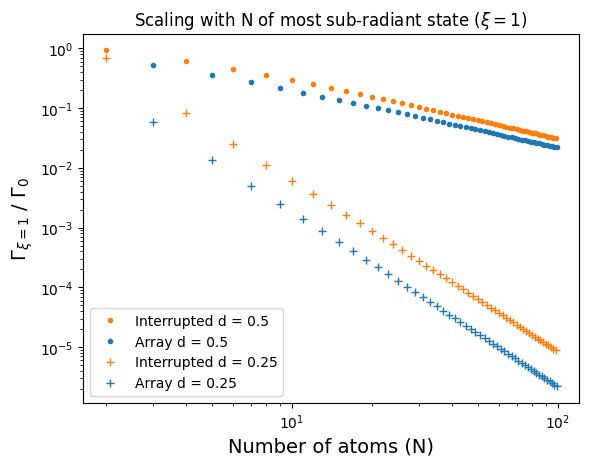

In [70]:
array_decayrates_n_reversed_d5 = [-p for p in array_decayrates_n_d5]
interrupted_decayrates_n_reversed_d5 = [-p for p in interrupted_decayrates_n_d5]

array_decayrates_n_reversed_d25 = [-p for p in array_decayrates_n_d25]
interrupted_decayrates_n_reversed_d25 = [-p for p in interrupted_decayrates_n_d25]

# def ExpFit(x, A, k):
#     return A * k**(-x)
# par, cov = curve_fit(ExpFit, N_chain, ring_subradiant_decayrates_n_reversed, p0 = [1, 1])
# print('A = ', par[0], 'k = ', par[1])


plt.plot(N_chain_interrupted, interrupted_decayrates_n_reversed_d5, '.', color = '#ff7f0e', label = 'Interrupted d = 0.5')
plt.plot(N_chain, array_decayrates_n_reversed_d5, '.', color = '#1f77b4', label = 'Array d = 0.5')

plt.plot(N_chain_interrupted, interrupted_decayrates_n_reversed_d25, '+', color = '#ff7f0e', label = 'Interrupted d = 0.25')
plt.plot(N_chain, array_decayrates_n_reversed_d25, '+',  color = '#1f77b4', label = 'Array d = 0.25')

#plt.plot(N_chain, ExpFit(N_chain, *par), '-', label = r'Fit $0.38 \cdot 1.25^{-N}$')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Number of atoms (N)', size=14)
plt.ylabel(r'$\Gamma_{\xi=1} \ / \ \Gamma_0$', size = 14)
plt.legend()
plt.title(r'Scaling with N of most sub-radiant state ($\xi = 1$)');

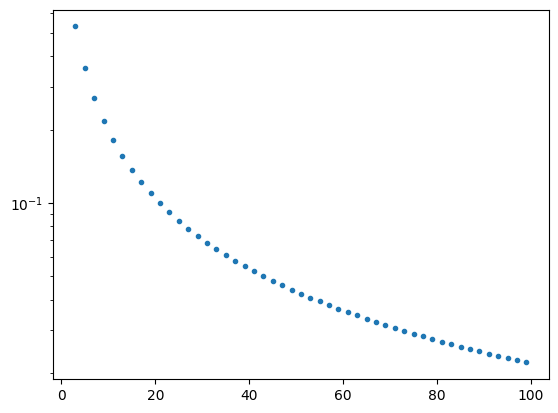

In [69]:
plt.plot(N_chain, array_decayrates_n_reversed_d5, '.', color = '#1f77b4', label = 'Array d = 0.5')

#plt.plot(N_chain, ExpFit(N_chain, *par), '-', label = r'Fit $0.38 \cdot 1.25^{-N}$')
plt.yscale('log')

In [34]:
array_decayrates_n_reversed

[0.14275802322191536,
 0.017705509353161585,
 0.004422914041048647,
 0.0016084455669647094,
 0.0007512667435536036,
 0.0004025068124377177,
 0.00024171061491631892,
 0.00015508640202192516,
 0.000106054075302945,
 7.529188521469366e-05,
 5.5657435853377884e-05,
 4.212388913641558e-05,
 3.2784485860807936e-05,
 2.5926215508174374e-05,
 2.0927814116154514e-05,
 1.708699365603079e-05,
 1.417274781818494e-05,
 1.1855920112983012e-05,
 1.004282673897478e-05,
 8.562799232684585e-06,
 7.375860490076793e-06,
 6.386274761575076e-06,
 5.576725187672345e-06,
 4.890025055390435e-06,
 4.318932446645264e-06,
 3.827490693775242e-06,
 3.4130787973066798e-06,
 3.0521066346465425e-06,
 2.744089257115462e-06,
 2.4729861364089687e-06,
 2.239275381686859e-06,
 2.0317124625161235e-06,
 1.8511729652540563e-06,
 1.6895648877877797e-06,
 1.547887267557716e-06,
 1.4201825443149046e-06,
 1.3074428141791763e-06,
 1.2051935048723858e-06,
 1.114361250932819e-06,
 1.031525580164312e-06,
 9.575252347134105e-07,
 8.89

### Start excitation delt mellem de to midterste

[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.7071068 0.7071068 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.       ]


Text(0, 0.5, '$|c_i|^2$')

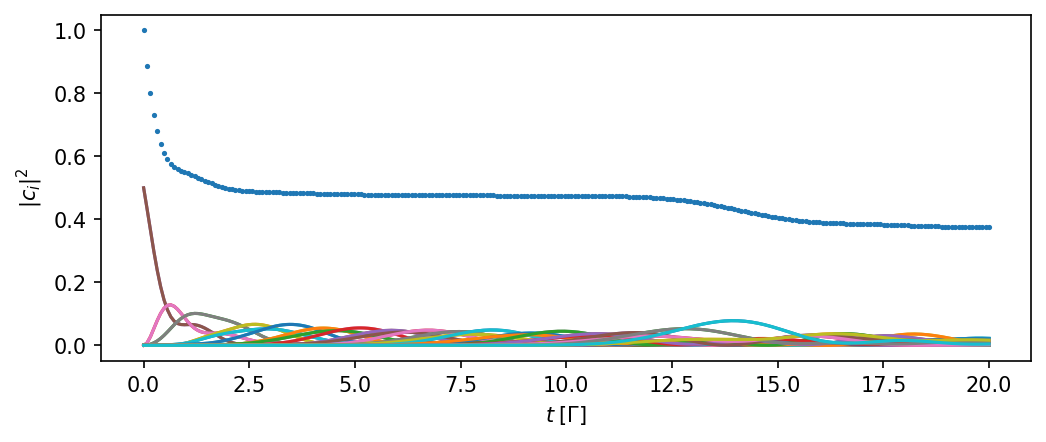

In [35]:
initial_state  = np.zeros(len(eig_vec_50))
initial_state[24] = 1/np.sqrt(2)
initial_state[25] = 1/np.sqrt(2)
print(initial_state)
t = np.linspace(0, 20, 250)  # Shape (100,)
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, t)

plt.figure(figsize=(8,3), dpi=150)
for i in range(len(eig_vec_50)): 
    plt.plot(t, site_prob_t[i,:], label = f"|c_{i+1}|^2")
plt.plot(t, np.sum(site_prob_t, axis=0), '.', markersize = 3, label = 'Summed coef') #all complex part are 0 just due to numerical precision we take .real
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r'$|c_i|^2$')
#plt.ylim(0,0.04)
#plt.legend();

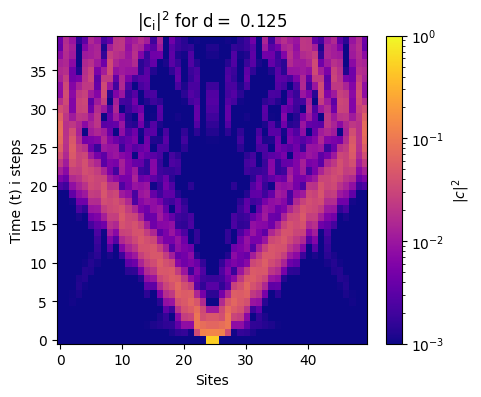

In [36]:
import matplotlib.colors as mcolors
# Plot heatmap
t = np.linspace(0, 20, 40)  # Shape (100,)
site_prob_t = Qchains.RandInitialStateEvolution(eig_val_50, eig_vec_50, initial_state, t)
plt.figure(figsize=(5, 4))

norm = mcolors.LogNorm(vmin=1e-3, vmax=1)

plt.imshow(site_prob_t.T, aspect='auto', cmap='plasma', origin='lower', norm=norm) #norm=norm

# Labels
plt.xlabel("Sites")
plt.ylabel("Time (t) i steps")
plt.colorbar(label=r'$|c|^2$')
plt.xticks(ticks=np.arange(0, len(site_prob_t), 10), labels=np.arange(0, len(site_prob_t), 10))  # Ensure x-axis has integer labels

#plt.title('$|c|^2$ with d = d_50')
plt.title(fr"$\mathrm{{|c_i|^2 \ for \ d =\ {d_50}}}$")
plt.show()

Note used custom colorscale to see values closer to 0. Just to see how it distributes. (Husk det er mere søgt at det ser sådan ud så)